# <font color = 'orange'><b>KNN : K-Nearest Neighbors</b></font>

K Nearest Neighbors algorithm is a simple machine learning algorithm that is used for both classification and regression problems.

It relies on the idea that the similar data points tend to have similar classes or labels. 
KNN algorithm assumes that the similar things exist in close proximity.

The KNN stores the entire training dataset as a reference, and when a new data point is given, it calculates the distance between the new data point and all the stored data points. 

### <b>The distance can of any type like </b>
<h3><font color = 'orange'><b>Euclidean Distance = √(Xtest - Xtrain)² + (ytest - ytrain)² </h3></b></font>

<h3><font color = 'orange'><b>Manhattan Distance = |Xtest - Xtrain| + |ytest - ytrain|</h3></b></font>

---

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# import titanic dataset
df = sns.load_dataset('titanic')

In [4]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
727,1,3,female,NaN,0,0,7.7375,Q,Third,woman,False,NaN,Queenstown,yes,True
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
783,0,3,male,NaN,1,2,23.4500,S,Third,man,True,NaN,Southampton,no,False
219,0,2,male,30.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
689,1,1,female,15.0,0,1,211.3375,S,First,child,False,B,Southampton,yes,False


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [6]:
df['age'] = imputer.fit_transform(df[['age']]).astype('int')

In [7]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

For simplicity and practice we are only selecting the two features `Fare` and `Age` to train the KNN model.

In [10]:
X = df[['age', 'fare']]
y = df[['survived']]

<Axes: xlabel='age', ylabel='fare'>

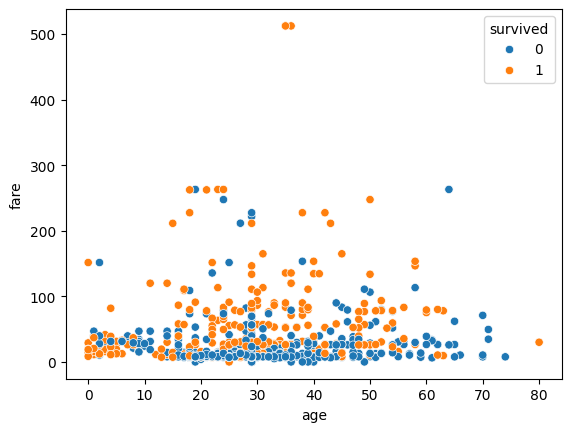

In [11]:
# Visualize the data

sns.scatterplot(x='age', y='fare', data=df, hue='survived')

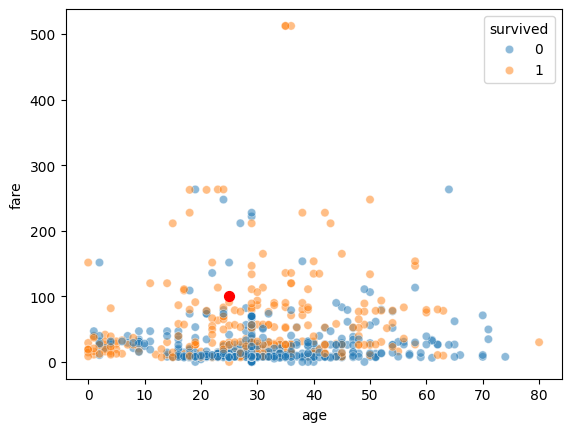

In [20]:
# Adding a new instance to the above plot to see if it will survive or not, 
sns.scatterplot(x='age', y='fare', data=df, hue='survived', alpha=0.5)
plt.scatter(25, 100, color='red', s=50)

# we can compare the new instance with the existing data to see if it will survive or not


In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [22]:
knn = KNeighborsClassifier(n_neighbors=20)

In [23]:
knn.fit(Xtrain, ytrain)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [24]:
ypred = knn.predict(Xtest)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.6591928251121076

### But how to choose the appropriate value of k

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

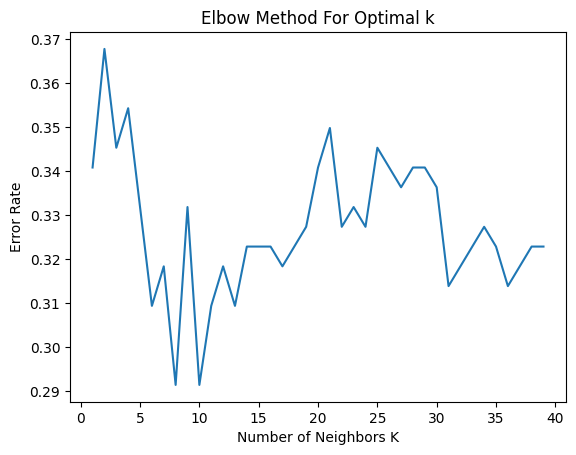

In [29]:
# Elbow method to find the best value of k
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    ypred = knn.predict(Xtest)
    error_rate.append(1 - accuracy_score(ytest, ypred))
    
plt.plot(range(1, 40), error_rate)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.title('Elbow Method For Optimal k')

By looking closely we can find that the error is minimum at k = 8 and k = 10
So will use any of these to values to get better result.

In [30]:
# k = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
accuracy_score(ytest, ypred)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7085201793721974

In [36]:
# k = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
accuracy_score(ytest, ypred)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7085201793721974

The accuracy is same for k = 8 and k = 10 and it is much better than k = 20

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       131
           1       0.79      0.40      0.53        92

    accuracy                           0.71       223
   macro avg       0.74      0.66      0.66       223
weighted avg       0.73      0.71      0.68       223



In [33]:
print(confusion_matrix(ytest, ypred))

[[121  10]
 [ 55  37]]
